<a href="https://colab.research.google.com/github/aanilkumarreddy/DataDiggers/blob/main/ARIMA_AAPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [10]:
df1 = pd.read_csv('AAPL.csv')
stock=df1

In [11]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,41.135746,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,41.128597,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,41.319622,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.790073,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.634853,82271200


In [12]:
stock['Date'].min()

'2018-01-02'

In [13]:
stock['Date'].max()

'2021-12-30'

In [14]:
stock.Date = pd.to_datetime(stock.Date, format='%Y%m%d', errors='ignore')

In [15]:
cols = ['High', 'Low', 'Open', 'Volume', 'Adj Close']
stock.drop(cols, axis=1, inplace=True)
stock = stock.sort_values('Date')

In [16]:
stock.isnull().sum()

Date     0
Close    0
dtype: int64

In [17]:
stock = stock.groupby('Date')['Close'].sum().reset_index()

In [18]:
stock.head()

,Date,Close
0,2018-01-02,43.064999
1,2018-01-03,43.057499
2,2018-01-04,43.257500
3,2018-01-05,43.750000
4,2018-01-08,43.587502


In [19]:
stock = stock.set_index('Date')
stock.index

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-16',
       ...
       '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
       '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30'],
      dtype='object', name='Date', length=1007)

In [20]:
#y = stock['Close'].resample('M').mean()
stock.index = pd.to_datetime(stock.index)

monthly_mean = stock.Close.resample('M').mean()

In [21]:
monthly_mean['2018':]

Date
2018-01-31     43.501309
2018-02-28     41.909737
2018-03-31     43.624048
2018-04-30     42.458572
2018-05-31     46.384204
2018-06-30     47.155357
2018-07-31     47.577857
2018-08-31     53.336522
2018-09-30     55.518421
2018-10-31     55.211413
2018-11-30     47.808929
2018-12-31     41.066579
2019-01-31     38.541548
2019-02-28     42.931973
2019-03-31     45.823453
2019-04-30     50.129048
2019-05-31     47.818409
2019-06-30     48.242250
2019-07-31     51.304091
2019-08-31     51.239432
2019-09-30     54.498750
2019-10-31     58.821630
2019-11-30     65.630126
2019-12-31     69.131428
2020-01-31     77.979048
2020-02-29     77.817631
2020-03-31     65.611023
2020-04-30     68.096547
2020-05-31     77.496376
2020-06-30     86.451590
2020-07-31     95.566250
2020-08-31    117.299762
2020-09-30    115.125237
2020-10-31    116.413182
2020-11-30    116.825999
2020-12-31    127.290455
2021-01-31    133.036842
2021-02-28    131.531579
2021-03-31    121.871304
2021-04-30    131.81

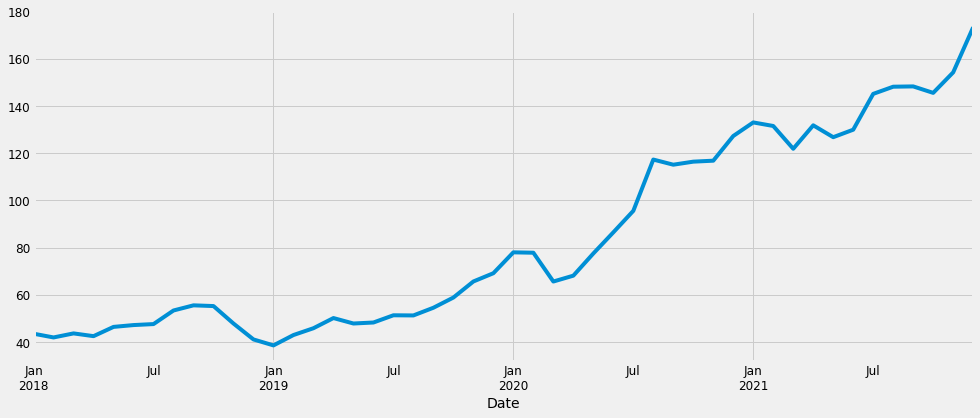

In [22]:
monthly_mean.plot(figsize=(15, 6))
plt.show()

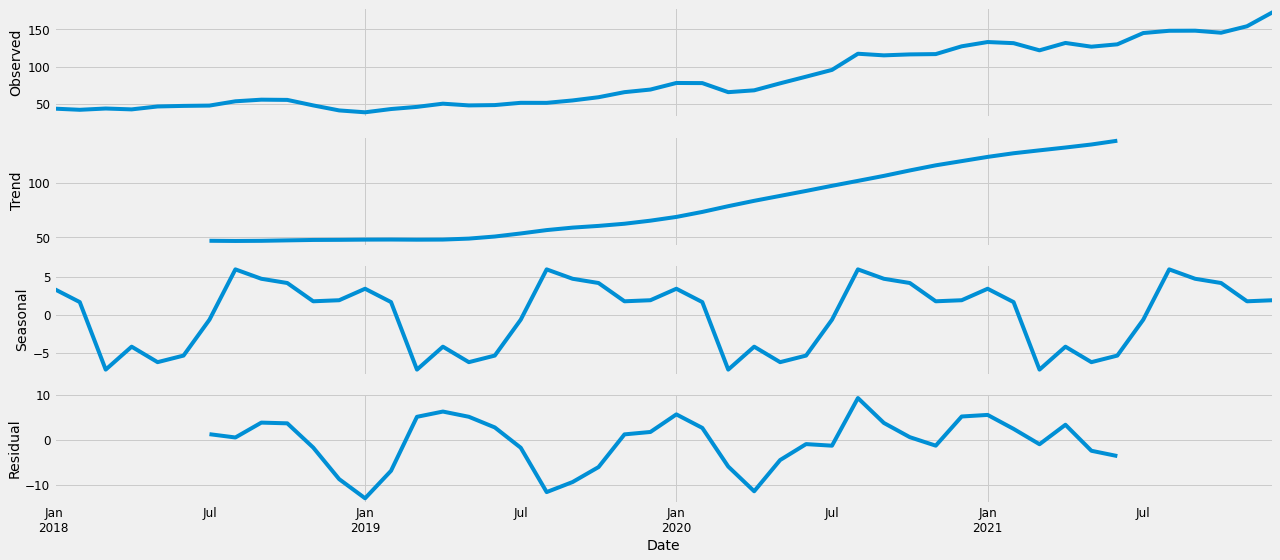

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_mean, model='additive')
fig = decomposition.plot()
plt.show()

In [24]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [25]:
l_param = []
l_param_seasonal=[]
l_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            l_param.append(param)
            l_param_seasonal.append(param_seasonal)
            l_results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:562.1590397669713
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1443.7798001546766
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:357.4220339782917
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:325.09958416912286


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1637.3342682112361
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:241.79261762865346
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:497.1845732716333
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2507.4695808389083
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:311.4017670680195


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:298.0368273108059
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2695.4538129060534
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:223.01639925288055
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:313.25441713217714


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1033.900120978061
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:245.12245578880155
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:244.86858595652353
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1382.968159015126
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:164.5057115172713
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:305.2994994469648
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1235.63167738684
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:240.5352730110401
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:245.49244059271814


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1335.2739597119105
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:166.13749156916992
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:311.4369625350566


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1501.2326756290315
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:253.73336168389028
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:240.83206445720825


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1401.1713255268983
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:165.88144115235065
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:306.5057188083474
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1484.4476484007
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:248.64721353196123
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:242.4974522794261


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1387.31243878124
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:167.59368366057836
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:311.08372423846527


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1460.2569860544509
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:246.69142070043375
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:239.19722771368595
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1571.7849546577243
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:160.18876062202395
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:307.1876412568213
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1410.9459922792491


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:242.53224461331578
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:241.1963356994783
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1518.4563617104377
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:162.0714616551254


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [26]:
minimum=l_results_aic[0]
for i in l_results_aic[1:]:
    if i < minimum: 
        minimum = i
i=l_results_aic.index(minimum)

In [27]:
mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                order=l_param[i],
                                seasonal_order=l_param_seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1292      0.323      0.400      0.689      -0.504       0.763
ar.S.L12      -0.5867      0.241     -2.436      0.015      -1.059      -0.115
sigma2        64.7609     28.851      2.245      0.025       8.214     121.308


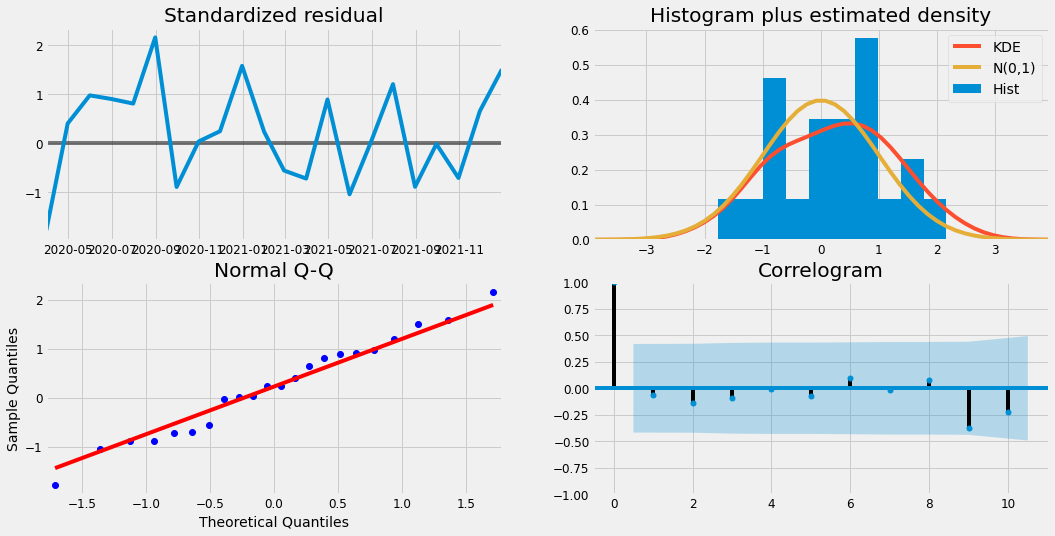

In [28]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

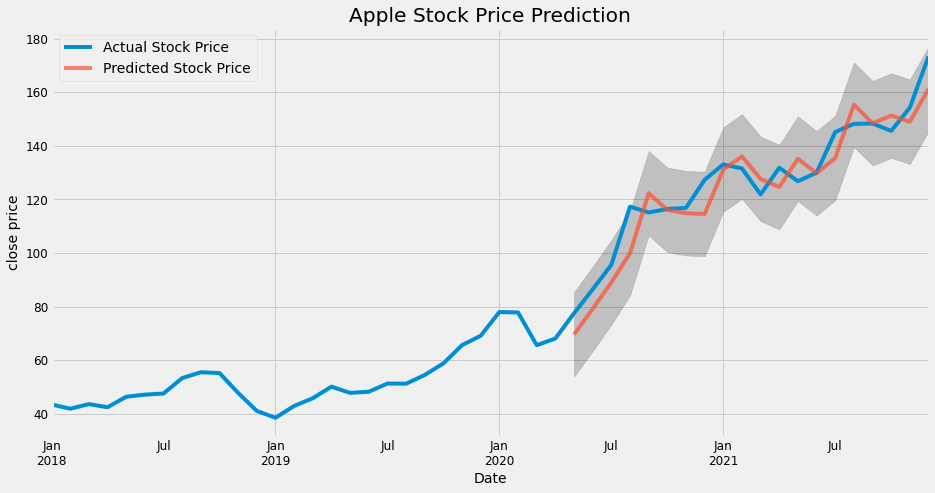

In [48]:
pred = results.get_prediction(start=pd.to_datetime('2020-05-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = monthly_mean['2018':].plot(label='Actual Stock Price')
pred.predicted_mean.plot(ax=ax, label='Predicted Stock Price', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('close price')
plt.legend()
plt.title('Apple Stock Price Prediction')
plt.show()

In [43]:
y_forecasted = pred.predicted_mean
y_truth = monthly_mean['2017-12-31':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 60.52


In [44]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 7.78


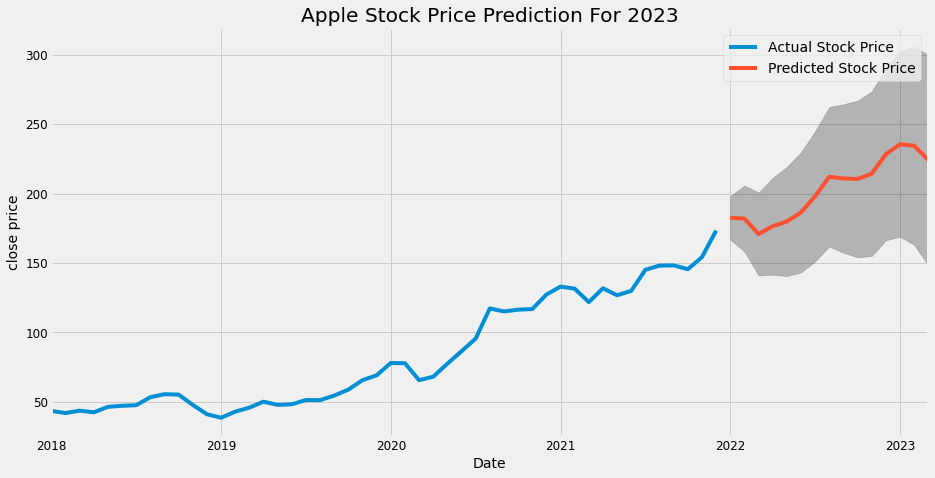

In [50]:
pred_uc = results.get_forecast(steps=15)
pred_ci = pred_uc.conf_int()

ax = monthly_mean.plot(label='Actual Stock Price', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Predicted Stock Price')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('close price')
plt.title('Apple Stock Price Prediction For 2023')
plt.legend()
plt.show()